Done. You have the matrices PP QQ  RR  SS  WW.
  
Done.
Total Simulation Length =  500
Number of Initial Values Discarded =  100
  
These are the UNFILTERED SIMULATION results.
  
  
You have the matrices "Response" and "Response_named"
which contain the models simulated reponses to
given values for the exogenous stochastic processes.
  
These are expressd as %-deviations from steady state.
  
If you want, you can download these into an excel file
or use them to make plots.
  
  
Simulated Series
x-axis: time periods,  y-axis:  %-deviation from steady state
  


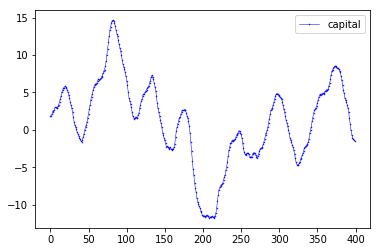

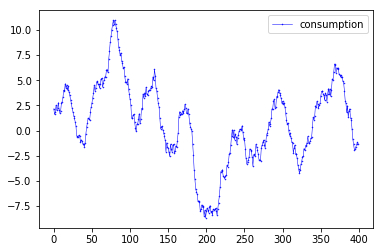

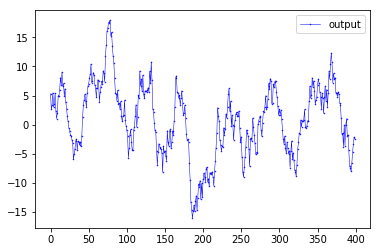

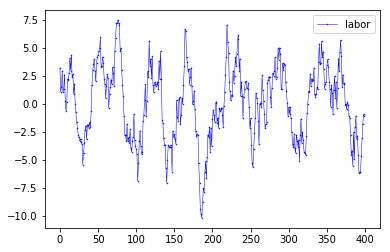

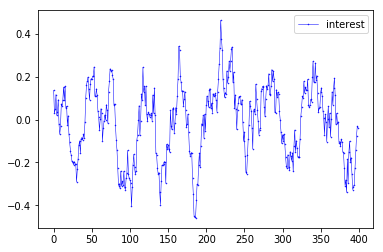

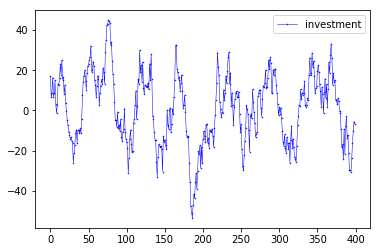

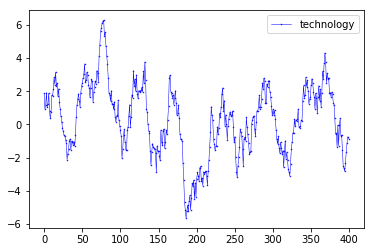

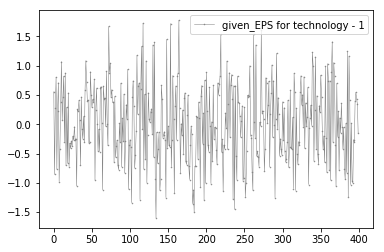

  
  
Response_named[:,0:6] = 
[['capital' '1.7995465901967491' '1.9185196977937546'
  '2.0914272277459642' '2.4459368780850395' '2.554316249707415']
 ['consumption' '2.162937564122437' '1.594814529947901'
  '1.8420051359444491' '2.518853888932262' '2.0035750977674653']
 ['output' '5.336836813054647' '2.65539434300282' '3.3361535393268196'
  '5.457435851274626' '3.024386884550305']
 ['labor' '3.173899248932209' '1.0605798130549184' '1.4941484033823698'
  '2.9385819623423632' '1.0208117867828381']
 ['interest' '0.13648016666671448' '0.02974070941001076'
  '0.04926277599327378' '0.1169687996676207' '0.020101137724667678']
 ['investment' '17.01721351030347' '6.558470894076976'
  '8.834820895882135' '16.27181324130897' '6.781111742980071']
 ['technology' '1.8763203450863561' '0.9296382583119293'
  '1.1691972486567914' '1.9163861304182284' '1.057397614409304']]
  
  
 
 
You have the matrices "SS_level_Response" and "SS_level_Response_named" 
  
These variables are levels, which are calcula

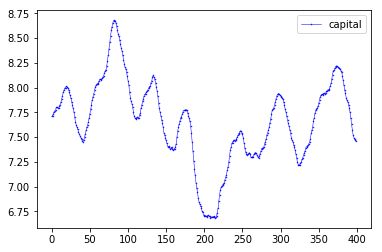

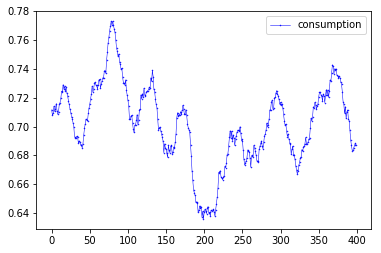

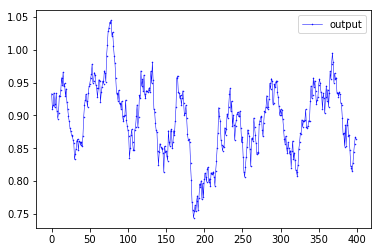

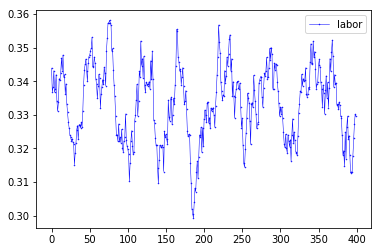

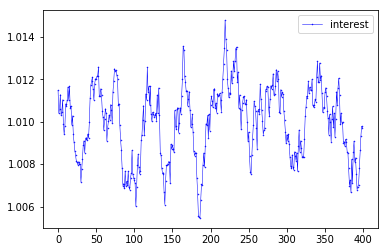

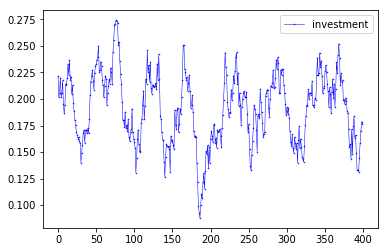

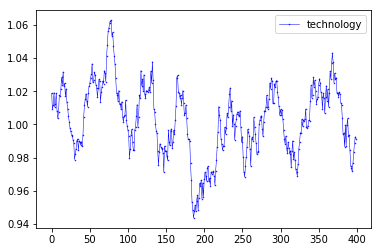

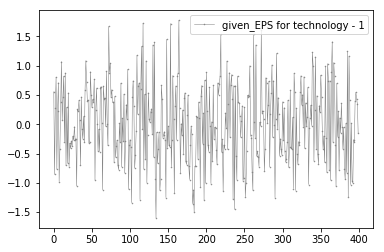

  
  
SS_level_Response_named[:,0:6] = 
[['capital' '7.707840838168531' '7.716848990052268' '7.729940833436969'
  '7.756782838651475' '7.76498887664071']
 ['consumption' '0.7116787326124643' '0.7077211224402282'
  '0.7094430805336799' '0.7141580865249119' '0.7105685954062948']
 ['output' '0.9331802243367558' '0.9094252952781782' '0.9154561486696882'
  '0.9342486125753418' '0.9126942043618161']
 ['labor' '0.34391299749644066' '0.3368685993768497' '0.3383138280112746'
  '0.3431286065411412' '0.3367360392892761']
 ['interest' '1.0114795976430981' '1.010401421307172' '1.010598613898922'
  '1.011282513127956' '1.0103040518962088']
 ['investment' '0.22150149172429148' '0.20170417283794997'
  '0.20601306813600834' '0.22009052605042992' '0.20212560895552129']
 ['technology' '1.0187632034508636' '1.0092963825831194'
  '1.0116919724865678' '1.0191638613041822' '1.010573976144093']]
  
  
 
 
You have the matrices "SS_ln_Response" and "SS_ln_Response_named" 
 
These are the equivalent natural log

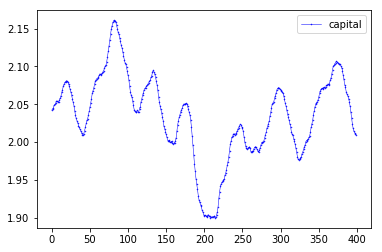

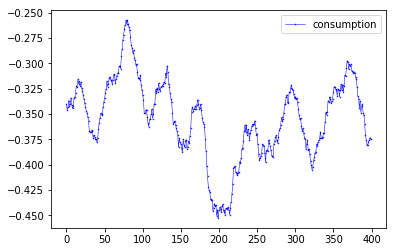

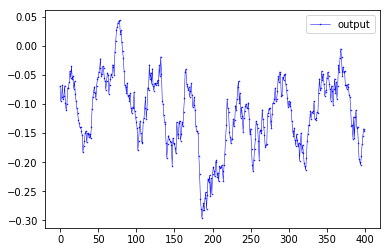

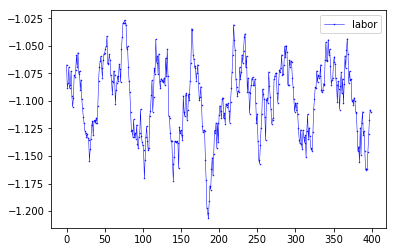

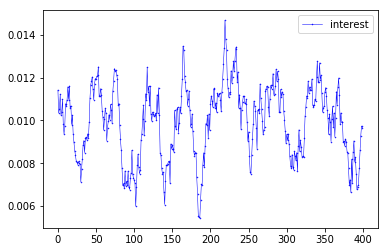

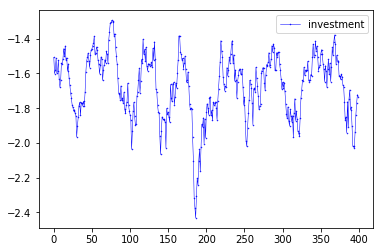

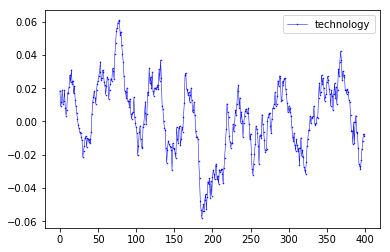

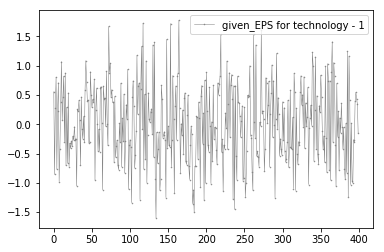

  
  
SS_ln_Response_named[:,0:6] = 
[['capital' '2.0422381014246223' '2.043406118805611' '2.045101208422168'
  '2.0485676655839753' '2.0496250241000378']
 ['consumption' '-0.34012868764066545' '-0.3457051577438091'
  '-0.3432750103589495' '-0.33665093145130653' '-0.34168979084649154']
 ['output' '-0.06915693029733805' '-0.0949424226292891'
  '-0.08833281479172012' '-0.06801269568551724' '-0.09135438947199861']
 ['labor' '-1.0673665678514754' '-1.088062337493887'
  '-1.0837813290344565' '-1.0696499559068668' '-1.0884559217469505']
 ['interest' '0.011414207024905367' '0.010347698730878527'
  '0.01054284231221525' '0.011219340298149492' '0.010251327030668136']
 ['investment' '-1.5073259548727103' '-1.6009531458971022'
  '-1.579815674651194' '-1.513716335217888' '-1.598865948322447']
 ['technology' '0.018589345931515074' '0.009253437171362781'
  '0.011624149520524893' '0.018982547303055694' '0.010518462647706077']]
  
  


In [2]:
#   Uhlig's Exampl05.m  Model 2
#   This is  "Economy 2" from Farmer, R.E.A. 
#   and J.T. Guo, "Real Business Cycles and the 
#   Animal Spirits Hypothesis," Journal of Economic 
#  Theory 63, 42-72 (1994).

#  Exampl05  is set-up correctly compared to
#  Exampl04.  Uhlig introduced an additional
#  state variable  c(t)

###  NOTE NOTE
### Py and MAT results match for Models 1 and 2,
### but not model 3
###  differences in eigenvalues matter in Model 3


import numpy as np


#  These are the parameters for  
#  Farmer-Guo Model 2  

lamb = 0.7
b = 0.63
a = 0.3                
psi =1.0/1.05 
sigma_sigma = 0.70

L_bar = 1.0/3
Z_bar = 1
delta = 0.025
rho = 0.99
eta = 1.0


alpha   = a/lamb
betta   = b/lamb  
R_bar = 1.0/rho
YK_bar = (R_bar + delta - 1)/a
K_bar = (YK_bar / (Z_bar*L_bar**betta) )**(1.0/(alpha-1))
I_bar = delta * K_bar
Y_bar = YK_bar * K_bar
C_bar = Y_bar - delta*K_bar
A_bar = C_bar**(-eta) * b * Y_bar/L_bar # Parameter in utility function
     
        

VARNAMES = ['capital',
                         'consumption',
                         'output',
                         'labor',
                         'interest',
                         'investment',
                         'technology']

SteadyState = [[K_bar],
                         [C_bar],
                         [Y_bar],
                         [L_bar],
                         [R_bar],
                         [I_bar],
                         [1]]

AA = np.vstack(([0, -C_bar],
                          [- K_bar, 0],
                          [0, 0],
                          [0, -eta],
                          [0, 0]))

BB = np.vstack(([0, 0],
                          [(1-delta)*K_bar, 0],
                          [alpha, 0],
                          [0, 0],
                          [-a*YK_bar, 0]))

CC = np.vstack(([Y_bar, 0, 0, -I_bar],
                           [0, 0, 0, I_bar],
                           [-1, betta, 0, 0],
                           [1, -1, 0, 0],
                           [a*YK_bar, 0, -R_bar, 0]))

DD = np.vstack(([0],
                           [0],
                           [1],
                           [0],
                           [0]))

FF = [0, -eta]

GG = [0, eta]

HH = [0, 0]

JJ = [0, 0, 1, 0]

KK = [0, 0, 0, 0]

LL = [0]

MM = [0]

NN = [psi]


Sigma = [sigma_sigma**2]

Sigma_EPS = Sigma


%run uhlig_solver_abreviated.ipynb


#print(' ')
#print('PP')
#print(PP.shape)
#print(PP)
#print(' ')
#print('RR')
#print(RR.shape)
#print(RR)
#print(' ')
#print('QQ')
#print(QQ.shape)
#print(QQ)
#print(' ')
#print('SS')
#print(SS.shape)
#print(SS)
#print(' ')


%run Uhlig_simul_rand.ipynb
